In [10]:
# HW6 - WeatherPy Final Rev

# Dependencies

import numpy as np
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
import random
import api_keys
import json
import citipy as city
import datetime

# Open Weather Map API Key

weather_key = api_keys.WEATHERKEY

In [11]:
# Generate 600 random lat and long but with the following qualification (balanced distribution
# from 0 to 90 and 0 to -90 for lat) and (balanced distribution from 0 to 180 and 0 to -180 for long)  

init_lat = []
init_long = []
final_city = []
final_country = []

for i in range(600):

    # Generate random lat/longs using random functions
    
    new_lat = random.randint(-90, 90) + random.random()
    new_long = random.randint(-180, 180) + random.random()
    init_lat.append(new_lat)
    init_long.append(new_long)

    # Use citypy function of nearest_city to identify the nearest cities associated to the random lat/longs
    # Append the final_city and final_country lists

    new_city = city.nearest_city(new_lat, new_long)
    final_city.append(new_city.city_name)
    final_country.append(new_city.country_code)

# Create a new DataFrame to store the needed data of city and country

world_cities_sample_df = pd.DataFrame(final_city)
world_cities_sample_df = world_cities_sample_df.rename(columns={0:'City'})
world_cities_sample_df["Country"] = final_country

# Remove duplicate cities on the data frame

world_cities_sample_df = world_cities_sample_df.drop_duplicates()

# Duplicate the world_cities DataFrame to iterate weather data

cities_temp = world_cities_sample_df
cities_temp.head(10)

,City,Country
0,busselton,au
1,gnjilane,rs
2,torbay,ca
3,avera,pf
4,lalibela,et
5,arraial do cabo,br
6,cidreira,br
7,caravelas,br
8,sibu,my
9,arauco,cl


In [12]:
# Save weather data config information

url = "http://api.openweathermap.org/data/2.5/weather"

parameters = {'appid': weather_key,
          'q': '',
          'units': 'Imperial'}

weather_data = []

# Loop through the list of cities and perform a request for data on each

for index, city in cities_temp.iterrows():
    # Get weather data
    parameters['q'] = city["City"] + "," + city["Country"] 
    response = req.get(url, params=parameters, ).json()
    
    # Print of each city as they are getting processed

    print(city["City"])
    print(url + "?appid=" + weather_key + "&q=" + str(city["City"])+ "," + str(city["Country"])+
             "&units=" + "Imperial") 

    if response["cod"] == 200:

        weather_data.append(response)

    else:

        # Remove the city from the main data frame

        world_cities_sample_df = world_cities_sample_df.loc[world_cities_sample_df["City"] != city["City"]]


#print(json.dumps(weather_data, indent=4, sort_keys=True))

busselton
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=busselton,au&units=Imperial
gnjilane
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=gnjilane,rs&units=Imperial
torbay
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=torbay,ca&units=Imperial
avera
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=avera,pf&units=Imperial
lalibela
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=lalibela,et&units=Imperial
arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=arraial do cabo,br&units=Imperial
cidreira
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=cidreira,br&units=Imperial
caravelas
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=caravelas,br&units=Imperial


gigmoto
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=gigmoto,ph&units=Imperial
bolshiye uki
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=bolshiye uki,ru&units=Imperial
okhotsk
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=okhotsk,ru&units=Imperial
lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=lavrentiya,ru&units=Imperial
charters towers
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=charters towers,au&units=Imperial
podgornoye
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=podgornoye,ru&units=Imperial
avarua
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=avarua,ck&units=Imperial
noyabrsk
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=noyabrsk,ru&u

sawtell
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=sawtell,au&units=Imperial
puerto del rosario
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=puerto del rosario,es&units=Imperial
waipawa
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=waipawa,nz&units=Imperial
jamestown
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=jamestown,sh&units=Imperial
lebu
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=lebu,cl&units=Imperial
provideniya
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=provideniya,ru&units=Imperial
alice springs
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=alice springs,au&units=Imperial
bandarbeyla
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=bandar

ambon
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=ambon,id&units=Imperial
frutal
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=frutal,br&units=Imperial
eydhafushi
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=eydhafushi,mv&units=Imperial
korcula
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=korcula,hr&units=Imperial
teya
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=teya,ru&units=Imperial
port keats
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=port keats,au&units=Imperial
sao filipe
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=sao filipe,cv&units=Imperial
nisia floresta
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=nisia floresta,br&units=Imperial
coah

kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=kudahuvadhoo,mv&units=Imperial
east london
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=east london,za&units=Imperial
alta floresta
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=alta floresta,br&units=Imperial
tautira
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=tautira,pf&units=Imperial
sudak
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=sudak,ua&units=Imperial
lorengau
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=lorengau,pg&units=Imperial
port hardy
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=port hardy,ca&units=Imperial
komsomolskiy
http://api.openweathermap.org/data/2.5/weather?appid=0738152741105955d4f9420f9a281f39&q=komsomolski

In [13]:
# Collect Needed Data and store to the final data frame

# Latitude
lat = []

# Longitude
lng = []

# Temperature in F (Imperial)
temperature = []

# Humidity in %
humidity = []

# Cloudiness in %
cloudiness = []

# Wind Speed in mph (Imperial)
wind_speed = []

# Loop through weather data, collect required data, and append the appropriate lists
for data in weather_data:

    lat.append(data['coord']['lat'])
    lng.append(data['coord']['lon'])
    temperature.append(data['main']['temp_max'])
    humidity.append(data['main']['humidity'])
    cloudiness.append(data['clouds']['all'])
    wind_speed.append(data['wind']['speed'])
    
#Store new data to the cities data frame

world_cities_sample_df["Latitude"] = lat
world_cities_sample_df["Longitude"] = lng
world_cities_sample_df['Temperature'] = temperature
world_cities_sample_df['Humidity'] = humidity
world_cities_sample_df['Cloudiness'] = cloudiness
world_cities_sample_df['Wind Speed'] = wind_speed

# Save the file to a csv file

world_cities_sample_df.to_csv("world_cities_weather.csv")

world_cities_sample_df.head(10)

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,busselton,au,-33.65,115.33,76.37,74,0,21.61
2,torbay,ca,47.67,-52.73,44.60,93,90,23.04
4,lalibela,et,12.03,39.03,57.79,41,0,2.71
5,arraial do cabo,br,-22.97,-42.03,77.90,75,24,18.48
6,cidreira,br,-30.18,-50.21,57.20,93,0,2.59
7,caravelas,br,-17.71,-39.25,77.36,100,80,14.56
8,sibu,my,2.30,111.82,87.80,74,75,2.24
9,arauco,cl,-37.25,-73.32,51.80,87,0,11.41
10,lieksa,fi,63.32,30.02,31.51,88,88,7.07
11,kijang,id,0.90,104.63,80.74,100,88,11.10


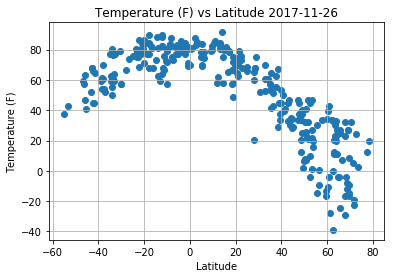

In [14]:
# Plot the Data in Scatter Plots

# Obtain today's date

today_date = datetime.date.today()

# Scatter Plot for Temperature vs Latitude

plt.scatter(lat, temperature, marker='o')
plt.grid(True)
plt.title("Temperature (F) vs Latitude " + str(today_date))
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("Temperature&Lat.png")
plt.show()


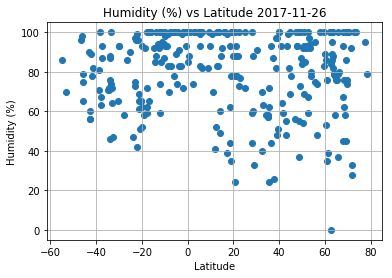

In [15]:
# Scatter Plot for Humidity vs Latitude

plt.scatter(lat, humidity, marker='o')
plt.grid(True)
plt.title("Humidity (%) vs Latitude " + str(today_date))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("Humidity&Lat.png")
plt.show()

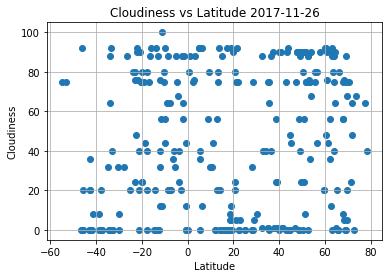

In [16]:
# Scatter Plot for Cloudiness vs Latitude

plt.scatter(lat, cloudiness, marker='o')
plt.grid(True)
plt.title("Cloudiness vs Latitude " + str(today_date))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("Cloudiness&Lat.png")
plt.show()

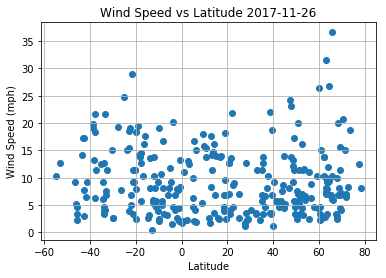

In [17]:
# Scatter Plot for Windspeed vs Latitude

plt.scatter(lat, wind_speed, marker='o')
plt.grid(True)
plt.title("Wind Speed vs Latitude " + str(today_date))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig("WindSpeed&Lat.png")
plt.show()